In [3]:
import openmm as openmm
import numpy as np
from openmm.app import *
from openmm import *
from simtk.unit import *
from sys import stdout
import matplotlib.pyplot as plt
from scipy.stats import sem

In [2]:
def Ktr (NH3,N2,H2,T):
    NH3fTR = ( ((2*np.pi*NH3*1.38e-23*T)**(1/2)) /6.626e-34)**3
    N2fTR = ( ((2*np.pi*N2*1.38e-23*T)**(1/2)) /6.626e-34)**3
    H2fTR = ( ((2*np.pi*H2*1.38e-23*T)**(1/2)) /6.626e-34)**3
    Keq = NH3fTR / (N2fTR**(1/2) * H2fTR**(3/2))
    return Keq * 6.022e26

In [3]:
# mass is in Kg
translational = Ktr(2.8e-26,4.649e-26,3.32e-27,800)
print("K translational is", translational, "at 800K")

K translational is 0.00016960097017117433 at 800K


In [4]:
def Krot (BaNH3,BbNH3,BcNH3,BH2,BN2, sigmaNH3,sigmaH2,sigmaN2,T):
    NH3 = ((np.pi**(1/2))/sigmaNH3) * np.sqrt( ((1.38e-23*T)**3) / (BaNH3*BbNH3*BcNH3) )
    N2 = (1.38e-23*T/ (sigmaN2*BN2) )
    H2 = (1.38e-23*T/ (sigmaH2*BH2) )
    return NH3/ (N2**(1/2) * H2**(3/2))

In [5]:
# conversion from cm to kj/mol
one = (9.44*100*3e8*6.626e-34)
two = (9.44*100*3e8*6.626e-34)
three = (6.19*100*3e8*6.626e-34)
four = (60.8*100*3e8*6.626e-34)
five = (1.998*100*3e8*6.626e-34)

In [6]:
rotational= Krot(one,two,three,four,five,6,2,2,800)
print ("K rotational is", rotational, "at 800 K")

K rotational is 1.4306100636589842 at 800 K


In [27]:
def Kvib (NH3w1, NH3w2, NH3w3, NH3w4, N2w, H2w, T):
    # our TA told me to multiply by the speed of light and 100
    # he also told me to multiply all 4 frequency expressions together for NH3
    Beta = 1/(1.38e-23*T)
    h = 6.626e-34
    NH3BHw1 = Beta*h*NH3w1*3e8*100
    NH3BHw2 = Beta*h*NH3w2*3e8*100
    NH3BHw3 = Beta*h*NH3w3*3e8*100
    NH3BHw4 = Beta*h*NH3w4*3e8*100
    
    N2BHw = Beta*h*N2w*3e8*100
    H2BHw = Beta*h*H2w*3e8*100
    
    Nh3f1 = (np.exp(-1*NH3BHw1/2)) / ( 1-np.exp(-1*NH3BHw1) )
    Nh3f2 = (np.exp(-1*NH3BHw2/2)) / ( 1-np.exp(-1*NH3BHw2) )
    Nh3f3 = (np.exp(-1*NH3BHw3/2)) / ( 1-np.exp(-1*NH3BHw3) )
    Nh3f4 = (np.exp(-1*NH3BHw4/2)) / ( 1-np.exp(-1*NH3BHw4) )
    NH3fexpression = Nh3f1*Nh3f2*Nh3f3*Nh3f4*Nh3f3*Nh3f4
    N2f = (np.exp(-1*N2BHw/2)) / ( 1-np.exp(-1*N2BHw) )
    H2f = (np.exp(-1*H2BHw/2)) / ( 1-np.exp(-1*H2BHw) )
    return NH3fexpression/(  N2f**(1/2) * H2f**(3/2) )

In [28]:
vibrational  = Kvib(3337, 950, 3444, 1627, 2359, 4161, 800)
vibrational

0.0024752342268924148

In [9]:
def Kel (NH3E, N2E, H2E, T):
    temp = 0.0083144*T
    NH3 = np.exp(-1*NH3E/temp)
    N2 = np.exp(-1*N2E/temp)
    H2 = np.exp(-1*H2E/temp)
    return NH3/(N2**(1/2) * H2**(3/2))

In [10]:
electronic = Kel(-1243, -943 , -457 , 800)
electronic

412246.00152741873

In [29]:
def Kproduct (T):
    Ktranslational = Ktr(2.8e-26,4.649e-26,3.32e-27,T)
    Krotational = Krot(one,two,three,four,five,6,2,2,T)
    Kvibrational = Kvib(3337, 950, 3444, 1627, 2359, 4161, 800)
    Kelectronic = Kel(-1242, -943 , -456 , T)
    return Ktranslational * Krotational * Kvibrational * Kelectronic

In [30]:
# this shows that I get about 0.3 for my Keq
Keq800 = Kproduct(800)
print ("Keq at 800K is", Keq800)

Keq at 800K is 0.2669123199843449


In [31]:
Keq = []
for i in np.arange(800,1201,1):
    Keq.append(Kproduct(i))
Keq_array = np.array(Keq)

In [32]:
log10Keq = np.log10(Keq_array)

In [33]:
Keq

[0.2669123199843449,
 0.2619585767936235,
 0.25710798311233635,
 0.2523581697178023,
 0.2477068266838988,
 0.24315170177899112,
 0.23869059891023567,
 0.23432137661286218,
 0.2300419465829867,
 0.2258502722526734,
 0.22174436740595702,
 0.21772229483448466,
 0.21378216503170466,
 0.20992213492427836,
 0.20614040663971495,
 0.20243522630901895,
 0.19880488290340448,
 0.19524770710390132,
 0.19176207020299846,
 0.18834638303727633,
 0.18499909495012912,
 0.1817186927836218,
 0.17850369989874834,
 0.17535267522299647,
 0.1722642123246968,
 0.1692369385131078,
 0.1662695139636291,
 0.16336063086729655,
 0.16050901260394368,
 0.15771341293820837,
 0.1549726152378119,
 0.1522854317133991,
 0.14965070267931677,
 0.14706729583471811,
 0.14453410556441887,
 0.14205005225886247,
 0.1396140816527141,
 0.13722516418151032,
 0.1348822943557865,
 0.13258449015227536,
 0.1303307924216057,
 0.12812026431204382,
 0.1259519907088085,
 0.1238250776885382,
 0.1217386519884423,
 0.11969186048973467,
 0.117

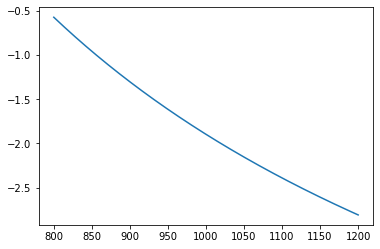

In [34]:
plt.plot(np.arange(800,1201,1),log10Keq)

In [ ]:
# number 1 part d

In [20]:
def Haber (T):
    Haber = 10**(2.1 + (2098/T) - (2.5088*np.log10(T)) - 1.006e-4*T + 1.86e-7*(T**2) + np.log10(0.0821*T))
    return Haber

def HaberLog(T):
    Haber = 2.1 + (2098/T) - (2.5088*np.log10(T)) - 1.006e-4*T + 1.86e-7*(T**2) + np.log10(0.0821*T)
    return Haber

In [139]:
# this shows that my Haber Keq is roughly 0.2
Haber_test = Haber(800)
print ("Harber Keq at 800K is", Haber_test)

Harber Keq at 800K is 0.1973426631556511


In [22]:
HaberKeq = []
for i in np.arange(800,1201,1):
    HaberKeq.append(HaberLog(i))
Haber_array = np.array(HaberKeq)

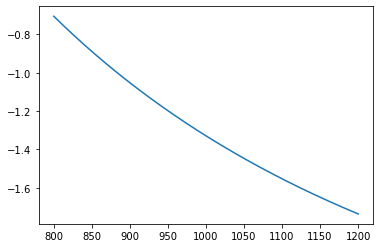

In [23]:
plt.plot(np.arange(800,1201,1),Haber_array)

In [1]:
# number 2

In [ ]:
# room temp part a

In [140]:
pdb = PDBFile('waterbox.pdb')
forcefield = ForceField('tip3p.xml')

In [141]:
system = forcefield.createSystem(pdb.topology, nonbondedMethod=PME,
                                nonbondedCutoff=0.9*nanometer, constraints=HBonds,rigidWater=True)
system.addForce(MonteCarloBarostat(1.01325*bar, 300*kelvin))

4

In [142]:
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)

In [ ]:
simulation = Simulation(pdb.topology, system, integrator)

In [ ]:
simulation.context.setPositions(pdb.positions)

In [ ]:
dcdReporter = DCDReporter("P6_trajectory300.dcd",10)

dataReporter = StateDataReporter("P6_log.txt",1000,totalSteps=50000, step=True, 
                                 speed=True, progress=True, potentialEnergy=True, temperature=True,separator="t")

simulation.reporters.append(dcdReporter)
simulation.reporters.append(dataReporter)

simulation.step(50000)

In [44]:
#370 part c

In [45]:
system = forcefield.createSystem(pdb.topology, nonbondedMethod=PME,
                                nonbondedCutoff=0.9*nanometer, constraints=HBonds,rigidWater=True)
system.addForce(MonteCarloBarostat(1.01325*bar, 370*kelvin))

4

In [46]:
integrator = LangevinIntegrator(370*kelvin, 1/picosecond, 0.002*picoseconds)

In [47]:
simulation = Simulation(pdb.topology, system, integrator)

In [48]:
simulation.context.setPositions(pdb.positions)

In [49]:
dcdReporter = DCDReporter("P6_trajectory370.dcd",10)

dataReporter = StateDataReporter("P6_log.txt",1000,totalSteps=50000, step=True, 
                                 speed=True, progress=True, potentialEnergy=True, temperature=True,separator="t")

simulation.reporters.append(dcdReporter)
simulation.reporters.append(dataReporter)

simulation.step(50000)

In [ ]:
# graph for part d

In [8]:
bestfit = np.loadtxt( 'oo.als_bestfit.dat' , unpack=True)
bestfit=np.array(bestfit)

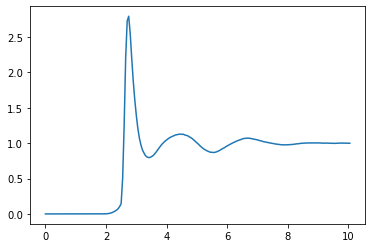

In [9]:
plt.plot(bestfit[0], bestfit[1])

plt.show()


In [ ]:
# new forcefield part e

In [16]:
PE_forcefield = ForceField('tip3pfb.xml')

In [17]:
system = PE_forcefield.createSystem(pdb.topology, nonbondedMethod=PME,
                                nonbondedCutoff=0.9*nanometer, constraints=HBonds,rigidWater=True)
system.addForce(MonteCarloBarostat(1.01325*bar, 300*kelvin))

4

In [18]:
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)

In [19]:
simulation = Simulation(pdb.topology, system, integrator)

In [20]:
simulation.context.setPositions(pdb.positions)

In [21]:
dcdReporter = DCDReporter("parte_trajectory300.dcd",10)

dataReporter = StateDataReporter("P6_log.txt",1000,totalSteps=50000, step=True, 
                                 speed=True, progress=True, potentialEnergy=True, temperature=True,separator="t")

simulation.reporters.append(dcdReporter)
simulation.reporters.append(dataReporter)

simulation.step(50000)

In [ ]:
# problem 3 starting state

In [35]:
pdb = PDBFile('water512-na.pdb')
# replace forcefield with the initial state
forcefield = ForceField('Naplusinitial.xml','tip3pfb.xml')

In [36]:
system = forcefield.createSystem(pdb.topology, nonbondedMethod=PME,
                                nonbondedCutoff=0.9*nanometer, constraints=HBonds,rigidWater=True)

In [37]:
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)

In [38]:
initial_simulation = Simulation(pdb.topology, system, integrator)

In [39]:
initial_simulation.context.setPositions(pdb.positions)

In [40]:
dcdReporter = DCDReporter("initial.dcd",10)

dataReporter = StateDataReporter("P6_log.txt",1000,totalSteps=100000, step=True, 
                                 speed=True, progress=True, potentialEnergy=True, temperature=True,separator="t")

initial_simulation.reporters.append(dcdReporter)
initial_simulation.reporters.append(dataReporter)

initial_simulation.step(100000)

In [42]:
initial_state = [] 
for i in range(5000): 
    initial_simulation.step(50) 
    initial_state.append(initial_simulation.context.getState(getPositions=True).getPositions())

In [ ]:
# middle state 

In [43]:
pdb = PDBFile('water512-na.pdb')
# replace forcefield with the initial state
forcefield_middle = ForceField('Naplusmiddle.xml','tip3pfb.xml')

In [44]:
system = forcefield_middle.createSystem(pdb.topology, nonbondedMethod=PME,
                                nonbondedCutoff=0.9*nanometer, constraints=HBonds,rigidWater=True)

In [45]:
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)

In [46]:
middle_simulation = Simulation(pdb.topology, system, integrator)

In [47]:
middle_simulation.context.setPositions(pdb.positions)

In [48]:
dcdReporter = DCDReporter("middlestate.dcd",10)

dataReporter = StateDataReporter("P6_log.txt",1000,totalSteps=100000, step=True, 
                                 speed=True, progress=True, potentialEnergy=True, temperature=True,separator="t")

middle_simulation.reporters.append(dcdReporter)
middle_simulation.reporters.append(dataReporter)

middle_simulation.step(100000)

In [49]:
middle_state = [] 
for i in range(5000): 
    middle_simulation.step(50) 
    middle_state.append(middle_simulation.context.getState(getPositions=True).getPositions()) 

In [60]:
# 3D
# compute energy gap for each simulation saved position 
middle_start = []
for i in range(5000):
    initial_simulation.context.setPositions(initial_state[i])
    initial_energy = initial_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    middle_simulation.context.setPositions(initial_state[i])
    middle_energy = middle_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    energy_gap = middle_energy - initial_energy
    middle_start.append(energy_gap)

In [18]:
middle_start = np.array(middle_start)
print(middle_start)

NameError: name 'middle_start' is not defined

In [130]:
# this is the delta where the initial state is used <>A
# 3E
kb = 0.00831
T = 300
beta = 1/(kb*T)
exponential = np.exp(-1*beta*middle_start)
average = np.average(exponential)
DeltaA = -1*kb*np.log(average)
DeltaA

0.043757749953929184

In [17]:
# this is the top 10 
top10e = np.argsort(middle_start)[len(middle_start)-10::]
top10e

NameError: name 'middle_start' is not defined

In [69]:
middle_startB = []
for i in range(5000):
    initial_simulation.context.setPositions(middle_state[i])
    initial_energyB = initial_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    middle_simulation.context.setPositions(middle_state[i])
    middle_energyB = middle_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    energy_gap = middle_energyB - initial_energyB
    middle_startB.append(energy_gap)

In [74]:
middle_startB = np.array(middle_startB)
middle_startB

array([ 3.12427149,  6.35083399,  3.71020899, ..., -0.67260351,
       -1.11791601,  2.31958399])

In [131]:
# this is the delta that is when middle state is used <>B

exponentialB = np.exp(-1*beta*middle_startB)
averageB = np.average(exponentialB)
DeltaB = -1*kb*np.log(averageB)
DeltaB

0.003105600963268707

In [19]:
trial1 = []
for i in range(5000):
    initial_simulation.context.setPositions(initial_state[i])
    initial_energy = initial_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    middle_simulation.context.setPositions(initial_state[i])
    middle_energy = middle_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    energy_gap = middle_energy - initial_energy
    trial1.append(energy_gap)
trial1 = np.array(trial1)

exponential1 = np.exp(-1*beta*trial1)
average1 = np.average(exponential1)
Delta1 = -1*kb*np.log(average1)
Delta1

NameError: name 'initial_simulation' is not defined

In [ ]:
trial2 = []
for i in range(5000):
    initial_simulation.context.setPositions(initial_state[i])
    initial_energy = initial_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    middle_simulation.context.setPositions(initial_state[i])
    middle_energy = middle_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    energy_gap = middle_energy - initial_energy
    trial2.append(energy_gap)
trial2 = np.array(trial2)

exponential2 = np.exp(-1*beta*trial2)
average2 = np.average(exponential2)
Delta2 = -1*kb*np.log(average2)
Delta2

In [ ]:
trial3 = []
for i in range(5000):
    initial_simulation.context.setPositions(initial_state[i])
    initial_energy = initial_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    middle_simulation.context.setPositions(initial_state[i])
    middle_energy = middle_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    energy_gap = middle_energy - initial_energy
    trial3.append(energy_gap)
trial3 = np.array(trial3)

exponential3 = np.exp(-1*beta*trial3)
average3 = np.average(exponential3)
Delta3 = -1*kb*np.log(average3)
Delta3

In [ ]:
trial4 = []
for i in range(5000):
    initial_simulation.context.setPositions(initial_state[i])
    initial_energy = initial_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    middle_simulation.context.setPositions(initial_state[i])
    middle_energy = middle_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    energy_gap = middle_energy - initial_energy
    trial4.append(energy_gap)
trial4 = np.array(trial4)

exponential4 = np.exp(-1*beta*trial4)
average4 = np.average(exponential4)
Delta4 = -1*kb*np.log(average4)
Delta4

In [ ]:
trial5 = []
for i in range(5000):
    initial_simulation.context.setPositions(initial_state[i])
    initial_energy = initial_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    middle_simulation.context.setPositions(initial_state[i])
    middle_energy = middle_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    energy_gap = middle_energy - initial_energy
    trial5.append(energy_gap)
trial5 = np.array(trial5)

exponential5 = np.exp(-1*beta*trial5)
average5 = np.average(exponential5)
Delta5 = -1*kb*np.log(average5)
Delta5

In [ ]:
# standard error 
error = sem([Delta1,Delta2,Delta3,Delta4,Delta5])
error

In [ ]:
# final state 

In [77]:
pdb = PDBFile('water512-na.pdb')

forcefield_final = ForceField('tip3pfb.xml','naplus.xml')


In [78]:
system = forcefield_final.createSystem(pdb.topology, nonbondedMethod=PME,
                                nonbondedCutoff=0.9*nanometer, constraints=HBonds,rigidWater=True)

In [79]:
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)

In [80]:
final_simulation = Simulation(pdb.topology, system, integrator)

In [81]:
final_simulation.context.setPositions(pdb.positions)

In [82]:
dcdReporter = DCDReporter("final.dcd",10)

dataReporter = StateDataReporter("P6_log.txt",1000,totalSteps=100000, step=True, 
                                 speed=True, progress=True, potentialEnergy=True, temperature=True,separator="t")

final_simulation.reporters.append(dcdReporter)
final_simulation.reporters.append(dataReporter)

final_simulation.step(100000)

In [84]:
final_state = [] 
for i in range(5000): 
    final_simulation.step(50) 
    final_state.append(final_simulation.context.getState(getPositions=True).getPositions())  

In [85]:
# finding the energy gap between middle and final state
final_middle = []
for i in range(5000):
    middle_simulation.context.setPositions(middle_state[i])
    middle_energy = middle_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    final_simulation.context.setPositions(middle_state[i])
    final_energy = final_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    energy_gap = final_energy - middle_energy
    final_middle.append(energy_gap) 

In [132]:
final_middle = np.array(final_middle)
final_middle

array([-12.70653582, -77.06591082, -20.61278582, ..., -11.77684832,
       -38.09716082,  10.36377668])

In [133]:
exponentialFM = np.exp(-1*beta*final_middle)
averageFM = np.average(exponentialFM)
DeltaFM = -1*kb*np.log(averageFM)
DeltaFM

-0.49622124534666506

In [89]:
final_middleB = []
for i in range(5000):
    initial_simulation.context.setPositions(final_state[i])
    initial_energyB = initial_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    middle_simulation.context.setPositions(final_state[i])
    middle_energyB = middle_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    energy_gap = middle_energyB - initial_energyB
    final_middleB.append(energy_gap)

In [90]:
final_middleB = np.array(final_middleB)
final_middleB

array([47.41333399, 39.47583399, 53.92114649, ..., 44.17114649,
       56.99145899, 61.60083399])

In [134]:
exponentialFMB = np.exp(-1*beta*final_middleB)
averageFMB = np.average(exponentialFMB)
DeltaFMB = -1*kb*np.log(averageFMB)
DeltaFMB

0.10696733364528754

In [ ]:
trial1f = []
for i in range(5000):
    initial_simulation.context.setPositions(initial_state[i])
    initial_energy = initial_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    middle_simulation.context.setPositions(initial_state[i])
    middle_energy = middle_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    energy_gap = middle_energy - initial_energy
    trial1f.append(energy_gap)
trial1f = np.array(trial1f)

exponential1f = np.exp(-1*beta*trial1f)
average1f = np.average(exponential1f)
Delta1f = -1*kb*np.log(average1f)

trial2f = []
for i in range(5000):
    initial_simulation.context.setPositions(initial_state[i])
    initial_energy = initial_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    middle_simulation.context.setPositions(initial_state[i])
    middle_energy = middle_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    energy_gap = middle_energy - initial_energy
    trial2f.append(energy_gap)
trial2f = np.array(trial2f)

exponential2f = np.exp(-1*beta*trial2f)
average2f = np.average(exponential2f)
Delta2f = -1*kb*np.log(average2f)

trial3f = []
for i in range(5000):
    initial_simulation.context.setPositions(initial_state[i])
    initial_energy = initial_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    middle_simulation.context.setPositions(initial_state[i])
    middle_energy = middle_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    energy_gap = middle_energy - initial_energy
    trial3f.append(energy_gap)
trial3f = np.array(trial3f)

exponential3f = np.exp(-1*beta*trial3f)
average3f = np.average(exponential3f)
Delta3f = -1*kb*np.log(average3f)

trial4f = []
for i in range(5000):
    initial_simulation.context.setPositions(initial_state[i])
    initial_energy = initial_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    middle_simulation.context.setPositions(initial_state[i])
    middle_energy = middle_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    energy_gap = middle_energy - initial_energy
    trial4f.append(energy_gap)
trial4f = np.array(trial4f)

exponential4f = np.exp(-1*beta*trial4f)
average4f = np.average(exponential4f)
Delta4f = -1*kb*np.log(average4f)

trial5f = []
for i in range(5000):
    initial_simulation.context.setPositions(initial_state[i])
    initial_energy = initial_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    middle_simulation.context.setPositions(initial_state[i])
    middle_energy = middle_simulation.context.getState(getEnergy=True).getPotentialEnergy()/(kilojoule/mole)
    energy_gap = middle_energy - initial_energy
    trial5f.append(energy_gap)
trial5f = np.array(trial5f)

exponential5f = np.exp(-1*beta*trial5f)
average5f = np.average(exponential5f)
Delta5f = -1*kb*np.log(average5f)

In [ ]:
# standard error 
errorfinal = sem([Delta1f,Delta2f,Delta3f,Delta4f,Delta5f])
errorfinal

In [ ]:
# top 10 values
top10f = np.argsort(final_middle)[len(final_middle)-10::]
top10f

In [137]:
# part G
deltaGLr = 0.5*( np.average(middle_startB) + np.average(final_middleB) )
deltaGLr

26.208707431763667

In [ ]:
deltaGLr1 = 0.5*( np.average(trial1) + np.average(trial1f) )
deltaGLr1

In [ ]:
deltaGLr2 = 0.5*( np.average(trial2) + np.average(trial2f) )
deltaGLr2

In [ ]:
deltaGLr3 = 0.5*( np.average(trial3) + np.average(trial3f) )
deltaGLr3

In [ ]:
deltaGLr4 = 0.5*( np.average(trial4) + np.average(trial4f) )
deltaGLr4

In [ ]:
deltaGLr5 = 0.5*( np.average(trial5) + np.average(trial5f) )
deltaGLr5

In [ ]:
# standard error for part g
errorg = sem([deltaGLr1,deltaGLr2,deltaGLr3,deltaGLr4,deltaGLr5])
errorg

In [ ]:
# part h 
addition = sum([DeltaFM,DeltaA])
addition

7